# 📘 Espacio Fila de una Matriz

El **espacio fila** de una matriz es uno de los subespacios fundamentales en álgebra lineal.  
A través de él entendemos la estructura de las ecuaciones del sistema lineal asociado y el papel de las combinaciones lineales entre filas.

---

# 1. 🎯 ¿Qué es el espacio fila?

Sea una matriz $A \in \mathbb{R}^{m \times n}$ con filas:

$$
A =
\begin{pmatrix}
\mathbf{r}_1 \\
\mathbf{r}_2 \\
\vdots \\
\mathbf{r}_m 
\end{pmatrix}
$$

El **espacio fila** se define como:

$$
\text{Espacio Fila}(A) = \text{span}\{\mathbf{r}_1, \mathbf{r}_2, \dots, \mathbf{r}_m\},
$$

es decir:

- el conjunto de **todas las combinaciones lineales** de las filas de $A$,
- un **subespacio de $\mathbb{R}^n$**.

---

# 2. 🧠 Interpretación conceptual

### ✔️ Cada fila representa una ecuación

Si $A\mathbf{x}=\mathbf{b}$, cada fila corresponde a:

$$
r_{i1}x_1 + r_{i2}x_2 + \dots + r_{in} x_n = b_i
$$

El espacio fila describe **todas las ecuaciones posibles** que se pueden crear combinando las ecuaciones originales.

---

### ✔️ El espacio fila NO depende de las transformaciones por fila

Las operaciones elementales por fila:

- intercambiar filas  
- multiplicar una fila por un escalar $\neq 0$  
- sumar una fila por un múltiplo de otra  

NO cambian el espacio fila.  
(¡Cuidado! Sí cambian el espacio **columna**.)

Por eso:

$$
\text{Espacio Fila}(A) = \text{Espacio Fila}(\text{RREF}(A)).
$$

Esto es fundamental: **las filas no nulas de la forma reducida representan una base del espacio fila**.

---

# 3. 📐 Ejemplo intuitivo en $\mathbb{R}^3$

Sea:

$$
A = 
\begin{pmatrix}
1 & 2 & 3 \\
2 & 4 & 6
\end{pmatrix}
$$

La segunda fila es el doble de la primera.  
Por tanto:

- hay **una sola ecuación independiente**,
- el espacio fila es una **línea** en $\mathbb{R}^3$:

$$
\text{Espacio Fila}(A) = \text{span}\{(1,2,3)\}.
$$

Dimensión = 1.

---

# 4. 🔧 Cálculo del espacio fila

## Paso 1. Reducir a REF o RREF

In [1]:
import sympy as sp

A = sp.Matrix([
    [1, 2, 3],
    [2, 4, 6],
    [1, 1, 0]
])

A_rref, pivots = A.rref()
A_rref

Matrix([
[1, 0, -3],
[0, 1,  3],
[0, 0,  0]])


---

## Paso 2. Las filas **no nulas** de la RREF forman una base

In [2]:
basis_row_space = [A_rref[i,:] for i in range(A_rref.rows) if any(A_rref[i,:])]
basis_row_space

[Matrix([[1, 0, -3]]), Matrix([[0, 1, 3]])]


---

# 5. 🔍 Ejemplo completo

$$
A=
\begin{pmatrix}
1 & 2 & -1 \
2 & 4 & 0 \
1 & 1 & -1
\end{pmatrix}
$$

### Paso 1: RREF

In [3]:
A = sp.Matrix([
    [1,2,-1],
    [2,4,0],
    [1,1,-1]
])

A_rref, pivots = A.rref()
A_rref

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])


Resultado típico:

$$
\begin{pmatrix}
1 & 0 & -3 \\
0 & 1 & 1 \\
0 & 0 & 0 \\
\end{pmatrix}
$$

### Paso 2: Base del espacio fila

Filas no nulas:

$$
\left
(1,0,-3),\\ (0,1,1) \\
\right.
$$

Entonces:

$$
\text{Espacio Fila}(A)=\text{span}
\left
(1,0,-3),\\ (0,1,1)
\right.
$$

Dimensión = número de filas no nulas = 2.

---

# 6. 📊 Visualización (en $\mathbb{R}^3$)

El espacio fila es un **plano**, ya que tiene dimensión 2.

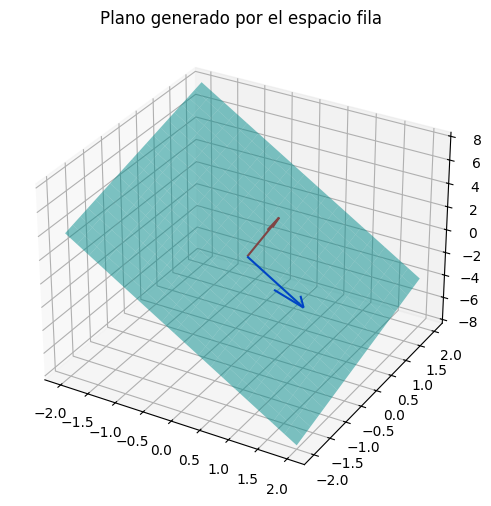

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# vectores base del espacio fila
u = np.array([1,0,-3])
v = np.array([0,1,1])

# generar plano
s = np.linspace(-2,2,20)
t = np.linspace(-2,2,20)
S,T = np.meshgrid(s,t)

X = S*u[0] + T*v[0]
Y = S*u[1] + T*v[1]
Z = S*u[2] + T*v[2]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,Z,alpha=0.5,color='cyan')

ax.quiver(0,0,0,u[0],u[1],u[2],color='blue')
ax.quiver(0,0,0,v[0],v[1],v[2],color='red')

ax.set_title("Plano generado por el espacio fila")
plt.show()


---

# 7. 🧰 Implementación reusable

In [5]:
def row_space(A):
    """Devuelve una base del espacio fila de A usando RREF."""
    A = sp.Matrix(A)
    A_rref, _ = A.rref()
    basis = [A_rref.row(i) for i in range(A_rref.rows) if any(A_rref.row(i))]
    return basis

def dimension_row_space(A):
    """Dimensión del espacio fila = número de filas no nulas de la RREF."""
    return len(row_space(A))


---

# 8. 🧩 Ejercicios sugeridos

### **1. Espacio fila de matrices aleatorias**

Genera matrices $4 \times 6$ aleatorias y obtén:

* base del espacio fila,
* dimensión,
* interpretación geométrica.

---

### **2. Matrices con filas dependientes**

Da ejemplos donde una fila es:

* múltiplo de otra,
* combinación de dos filas,
* suma de otras.

Verifica que eso reduce la dimensión del espacio fila.

---

### **3. Comparación REF vs RREF**

¿Cambian las bases?
¿Cambian las dimensiones?
Muestra ejemplos computacionales.

---

### **4. Espacio fila de $A$ y $A^T$**

Explora la relación entre:

* espacio fila de $A$,
* espacio columna de $A^T$.

---

### **5. Visualización en 3D**

Dibuja:

* líneas $dim=1$
* planos $dim=2$

a partir de diferentes matrices.

---

# 📚 Conclusión

El espacio fila nos muestra la estructura algebraica del sistema:

* cuántas ecuaciones independientes tenemos,
* qué combinaciones lineales pueden formarse,
* cuál es el rango del sistema.

> **“El espacio fila revela la esencia de las ecuaciones: lo que realmente aportan al sistema.”**

---

👉 **Siguiente archivo:** `espacio_columna.ipynb`
